In [24]:
import pandas as pd #Для работы с таблицами данных (дата фреймы)
import requests #Для запросов к серверу
import json #Для обработки ответов сервера
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web

In [25]:
def get_company_data(names, start_date, end_date):
    try:
        data = pd.read_csv('D:/Jupyter notebook/files/Все акции за весь период с Мосбиржи/Данные по всем акциям.csv', index_col=0, parse_dates=True)
    except FileNotFoundError:
        print("File not found!")
        return None

    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    selected_names = list(filter(lambda x: x in data.columns, names))

    if not selected_names:
        print("No data found for the specified company names!")
        return None
    
    # Select the rows corresponding to the specified company names and date range
    company_data = data.loc[(data.index >= start_date) & (data.index <= end_date), selected_names]
    
    # Return the selected data as a new DataFrame
    return pd.DataFrame(company_data)

In [26]:
compainies_imoex =['AKRN','AFKS', 'ALRS', 'BANE', 'GCHE', 'DETM', 'GAZP', 'SIBN', 'IRAO', 'LKOH', 'MGNT', 
                   'MTLR', 'MAGN', 'MMK', 'MOEX', 'MTSS', 'NLMK', 'GMKN', 'NVTK', 'PHOR', 'PIKK', 'POLY', 
                   'RTKM', 'RUAL', 'SBER', 'CHMF', 'SNGS', 'TATN', 'TRMK', 'TGKA', 'URKA',
                   'FIVE', 'AGRO','FIXP','GLTR','OZON','TCSG','VKCO','YNDX','AFLT','VTBR','GMKN',
                  'IRAO','CBOM',"MAGN","MGNT", "NLMK", "NVTK","PIKK", "PLZL", "ROSN" ,"HYDR", "CHMF",
                  "SNGS",]

In [27]:
len(set(compainies_imoex))

45

In [76]:
df_shares = get_company_data(compainies_imoex, '2012-01-01', '2023-01-01')

In [77]:
# assume `df` is the DataFrame with share prices
num_nans = df_shares.isna().sum()
col_with_fewest_nans = num_nans.idxmin()
df_shares = df_shares.dropna(subset=[col_with_fewest_nans])

In [78]:
df_shares = df_shares.dropna(thresh=0.8*len(df_shares.index), axis='columns')

In [79]:
df_shares = df_shares.interpolate(method='spline', order=3)
# drop all rows containing NaN values
df_shares = df_shares.dropna(subset=[col_with_fewest_nans])
df_shares = df_shares.dropna(axis=1)

In [80]:
df_shares

,AKRN,AFKS,ALRS,BANE,GCHE,GAZP,SIBN,IRAO,LKOH,MGNT,...,MAGN,MGNT,NLMK,NVTK,PIKK,PLZL,ROSN,HYDR,CHMF,SNGS
2012-01-03,1362.9,23.3955,30.7950,1380.0,559.9,177.445,150.340,0.034587,1731.0,2814.0,...,12.9070,2814.0,66.685,400.045,76.465,1030.0,218.000,1.00520,384.50,26.1440
2012-01-04,1334.5,23.9990,30.8000,1375.6,549.1,176.505,148.775,0.034614,1722.1,2815.0,...,12.8500,2815.0,66.800,395.730,76.600,1027.0,222.200,1.00855,390.45,26.0900
2012-01-05,1315.0,24.0450,30.1325,1374.9,540.0,177.100,148.750,0.034729,1723.2,2835.0,...,12.7190,2835.0,66.320,393.005,75.260,1017.5,219.160,1.00590,392.35,25.8410
2012-01-06,1325.8,24.4000,30.0930,1380.0,555.2,176.800,148.870,0.034315,1738.4,2820.0,...,12.8270,2820.0,67.600,389.825,74.800,1031.0,221.515,1.00400,404.55,26.0350
2012-01-09,1319.9,24.4700,30.0700,1370.0,588.8,177.255,148.500,0.033850,1754.3,2850.0,...,12.8560,2850.0,68.350,395.970,73.855,1054.7,221.535,1.00675,409.80,25.8100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,18092.0,11.8055,59.6550,921.5,2692.0,162.375,505.000,3.268750,4010.0,4442.0,...,32.2425,4442.0,115.650,1052.400,602.800,7809.0,352.400,0.75005,893.00,22.2375
2022-12-27,18100.0,12.2315,59.1450,943.5,2735.0,164.025,503.400,3.273000,4028.5,4425.5,...,32.1200,4425.5,114.230,1052.000,597.400,7862.0,355.450,0.75370,907.40,22.2850
2022-12-28,18090.0,12.1200,59.3150,941.5,2704.0,163.185,514.800,3.326000,4015.5,4414.5,...,32.4750,4414.5,115.770,1051.200,602.100,7770.0,355.100,0.76435,888.80,21.6550
2022-12-29,18170.0,12.4265,59.8900,940.0,2715.0,162.070,459.750,3.430250,4022.0,4407.5,...,32.5375,4407.5,116.040,1064.200,603.200,7734.0,359.600,0.76195,888.20,21.8500


In [81]:
tickers = df_shares.columns

In [82]:
# calculate equal weights for each stock
weights = pd.Series(1 / len(tickers), index=tickers)

In [83]:
df_shares

,AKRN,AFKS,ALRS,BANE,GCHE,GAZP,SIBN,IRAO,LKOH,MGNT,...,MAGN,MGNT,NLMK,NVTK,PIKK,PLZL,ROSN,HYDR,CHMF,SNGS
2012-01-03,1362.9,23.3955,30.7950,1380.0,559.9,177.445,150.340,0.034587,1731.0,2814.0,...,12.9070,2814.0,66.685,400.045,76.465,1030.0,218.000,1.00520,384.50,26.1440
2012-01-04,1334.5,23.9990,30.8000,1375.6,549.1,176.505,148.775,0.034614,1722.1,2815.0,...,12.8500,2815.0,66.800,395.730,76.600,1027.0,222.200,1.00855,390.45,26.0900
2012-01-05,1315.0,24.0450,30.1325,1374.9,540.0,177.100,148.750,0.034729,1723.2,2835.0,...,12.7190,2835.0,66.320,393.005,75.260,1017.5,219.160,1.00590,392.35,25.8410
2012-01-06,1325.8,24.4000,30.0930,1380.0,555.2,176.800,148.870,0.034315,1738.4,2820.0,...,12.8270,2820.0,67.600,389.825,74.800,1031.0,221.515,1.00400,404.55,26.0350
2012-01-09,1319.9,24.4700,30.0700,1370.0,588.8,177.255,148.500,0.033850,1754.3,2850.0,...,12.8560,2850.0,68.350,395.970,73.855,1054.7,221.535,1.00675,409.80,25.8100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,18092.0,11.8055,59.6550,921.5,2692.0,162.375,505.000,3.268750,4010.0,4442.0,...,32.2425,4442.0,115.650,1052.400,602.800,7809.0,352.400,0.75005,893.00,22.2375
2022-12-27,18100.0,12.2315,59.1450,943.5,2735.0,164.025,503.400,3.273000,4028.5,4425.5,...,32.1200,4425.5,114.230,1052.000,597.400,7862.0,355.450,0.75370,907.40,22.2850
2022-12-28,18090.0,12.1200,59.3150,941.5,2704.0,163.185,514.800,3.326000,4015.5,4414.5,...,32.4750,4414.5,115.770,1051.200,602.100,7770.0,355.100,0.76435,888.80,21.6550
2022-12-29,18170.0,12.4265,59.8900,940.0,2715.0,162.070,459.750,3.430250,4022.0,4407.5,...,32.5375,4407.5,116.040,1064.200,603.200,7734.0,359.600,0.76195,888.20,21.8500


In [132]:
import numpy as np
import pandas as pd

# Calculate returns for each stock
returns = df_shares.pct_change()

# Calculate annualized returns and volatilities for each year
annual_returns = returns.resample('Y').mean() * 252
annual_volatilities = returns.resample('Y').std() * np.sqrt(252)

# Create an empty DataFrame to store the results
results = pd.DataFrame(index=annual_returns.index, columns=['return', 'volatility'])

# Calculate equal weighted portfolio return and volatility for each year
for year in annual_returns.index.year:
    # Select returns and volatilities for the current year
    year_returns = annual_returns.loc[annual_returns.index.year == year]
    year_volatilities = annual_volatilities.loc[annual_volatilities.index.year == year]

    # Calculate equal weighted portfolio return
    equal_weights_return = np.dot(year_returns, weights)
    
    # Calculate equal weighted portfolio volatility
    equal_weights_volatility = np.sqrt((year_returns ** 2).dot(weights ** 2))
    
    # Store the results in the DataFrame
    results.loc[results.index.year == year, 'return'] = equal_weights_return[0]
    results.loc[results.index.year == year, 'volatility'] = equal_weights_volatility
    
# Convert the return and volatility columns to numeric types
results['return'] = pd.to_numeric(results['return'])
results['volatility'] = pd.to_numeric(results['volatility'])

#
portfolio_metrics = results.copy()

In [133]:
portfolio_metrics

,return,volatility
2012-12-31,-0.012728,0.053953
2013-12-31,0.029373,0.059274
2014-12-31,5.261701,3.638756
2015-12-31,0.375864,0.075864
2016-12-31,0.411614,0.092119
2017-12-31,-0.034904,0.036757
2018-12-31,0.043469,0.047624
2019-12-31,0.193879,0.048412
2020-12-31,0.206950,0.055970
2021-12-31,0.197077,0.053294


In [134]:
IMOEX = web.DataReader('IMOEX', 'moex', start='2012-01-01', end='2023-12-31')
IMOEX = IMOEX['CLOSE']
IMOEX_mtl =IMOEX.pct_change().resample('Y').agg(lambda x: (x+1).prod()-1)
IMOEX_mtl.name = 'return_imoex'
volatility_by_year_IMOEX = IMOEX.pct_change().resample('Y').apply(lambda x: np.sqrt(252) * x.std())
volatility_by_year_IMOEX.name = 'volatility_imoex'

C:\Users\Шамсутдинов Аяз\AppData\Local\Temp\ipykernel_20928\3998506127.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IMOEX = web.DataReader('IMOEX', 'moex', start='2012-01-01', end='2023-12-31')


In [151]:
yearly_results = pd.concat([portfolio_metrics, IMOEX_mtl, volatility_by_year_IMOEX ], axis = 1)
yearly_results['excess'] = yearly_results.iloc[:,0] - yearly_results.iloc[:,2]
yearly_results['outperformed'] = ['Yes' if i > 0 else 'No' for i in yearly_results.excess]
yearly_results= yearly_results.dropna()

In [160]:
yearly_results

,return,volatility,return_imoex,volatility_imoex,excess,outperformed
2012-12-31,-0.012728,0.053953,0.020737,0.194186,-0.033465,No
2013-12-31,0.029373,0.059274,0.019909,0.160346,0.009464,Yes
2015-12-31,0.375864,0.075864,0.261168,0.202411,0.114696,Yes
2016-12-31,0.411614,0.092119,0.267611,0.155074,0.144002,Yes
2017-12-31,-0.034904,0.036757,-0.055081,0.132745,0.020177,Yes
2018-12-31,0.043469,0.047624,0.123044,0.171257,-0.079575,No
2019-12-31,0.193879,0.048412,0.285541,0.111289,-0.091662,No
2020-12-31,0.206950,0.055970,0.079829,0.261118,0.127121,Yes
2021-12-31,0.197077,0.053294,0.151486,0.163306,0.045591,Yes
2022-12-31,-0.450146,0.190928,-0.431219,0.535314,-0.018926,No


In [154]:
#yearly_results.to_excel(r'mydata.xlsx')

In [158]:
yearly_results = yearly_results.drop('2014-12-31')

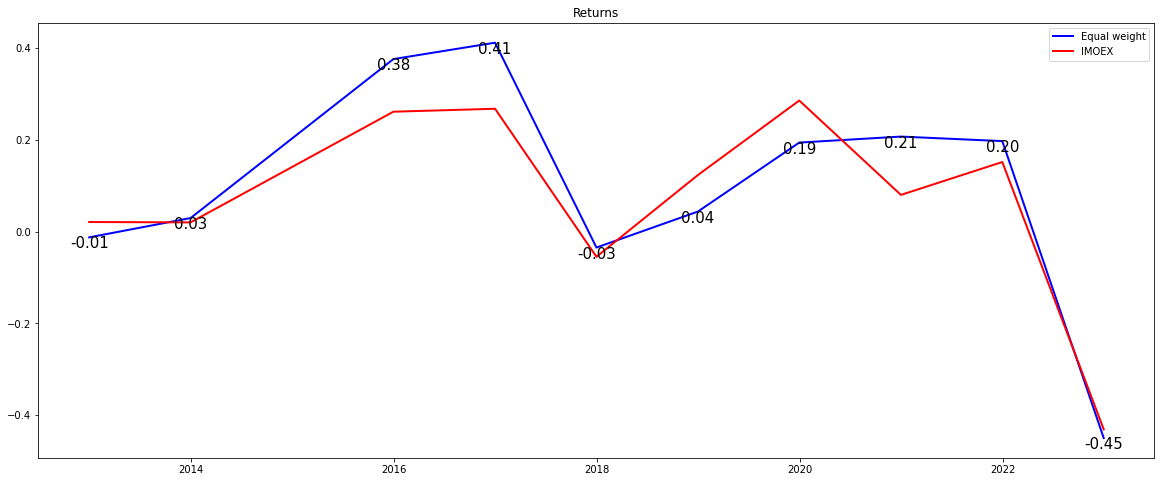

In [161]:
# Create the first plot for returns
fig1, ax1 = plt.subplots(figsize=(20, 8))
ax1.plot(yearly_results.index, yearly_results['return'], linewidth=2.0, color='blue', label='Equal weight')
ax1.plot(yearly_results.index, yearly_results['return_imoex'], linewidth=2.0, color='red', label='IMOEX')
for i, y in enumerate(yearly_results['return']):
    ax1.text(yearly_results.index[i], y - 0.03, f'{y:.2f}', ha='center', va='bottom', fontsize=15)
ax1.set_title('Returns')
ax1.legend()
plt.savefig('returns_2011-2022.jpg', bbox_inches='tight', dpi=100)
plt.show()

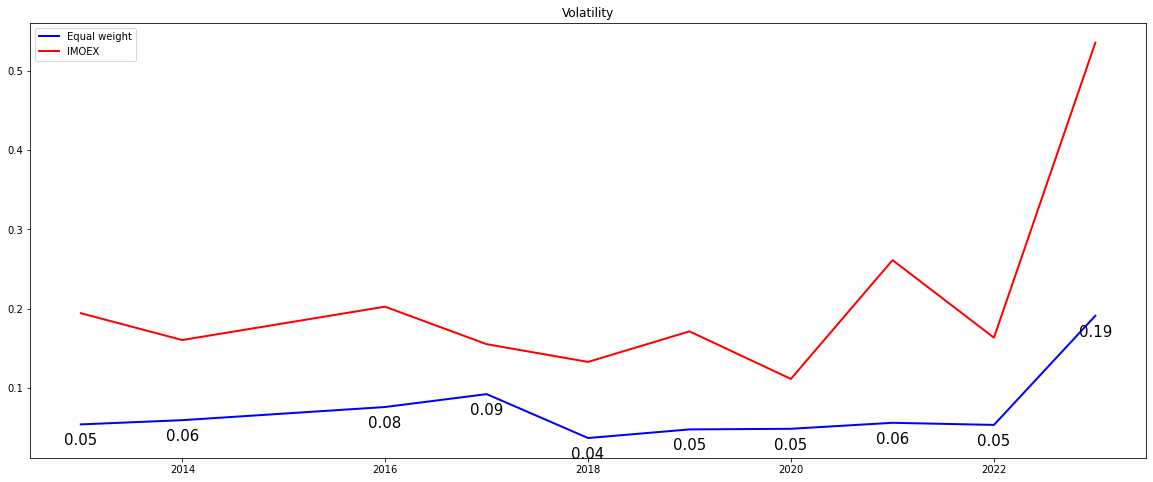

In [162]:
# Create the second plot for volatility
fig2, ax2 = plt.subplots(figsize=(20, 8))
ax2.plot(yearly_results.index, yearly_results['volatility'], linewidth=2.0, color='blue', label='Equal weight')
ax2.plot(yearly_results.index, yearly_results['volatility_imoex'], linewidth=2.0, color='red', label='IMOEX')
for i, y in enumerate(yearly_results['volatility']):
    ax2.text(yearly_results.index[i], y - 0.03, f'{y:.2f}', ha='center', va='bottom', fontsize=15)
ax2.set_title('Volatility')
ax2.legend()
plt.savefig('volatility_2011-2022.jpg', bbox_inches='tight', dpi=100)
plt.show()

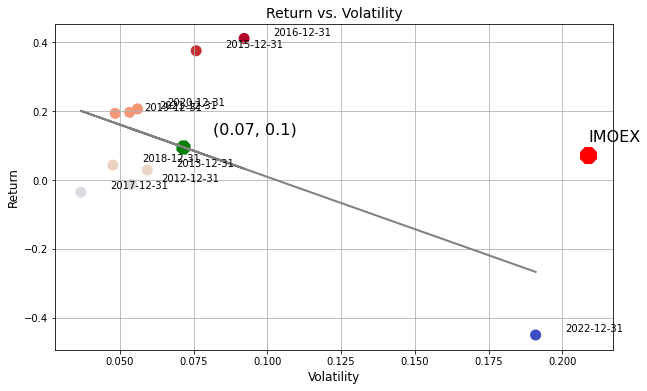

Weighted average return: 0.09604479570888949
Weighted average volatility: 0.07141952402833489


In [163]:
# Create scatter plot with text annotations and trend line
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.scatter(yearly_results['volatility'], yearly_results['return'], s=100, c=yearly_results['return'], cmap='coolwarm')

ax.scatter( yearly_results['volatility'].mean(),yearly_results['return'].mean(), color = 'green',marker = '8', s = 200)
ax.scatter(yearly_results['volatility_imoex'].mean(),yearly_results['return_imoex'].mean(), color = 'red',marker = '8', s = 300)

for i, year_range in enumerate(yearly_results.index.strftime('%Y-%m-%d')):
    ax.text(yearly_results['volatility'][i] + 0.01, yearly_results['return'][i] + 0.01, year_range, fontsize=10)
z = np.polyfit(yearly_results['volatility'], yearly_results['return'], 1)
p = np.poly1d(z)
ax.plot(yearly_results['volatility'], p(yearly_results['volatility']), "-", color='gray', linewidth=2)

# Set labels and title
ax.set_xlabel('Volatility', fontsize=12)
ax.set_ylabel('Return', fontsize=12)
ax.set_title('Return vs. Volatility', fontsize=14)

ax.annotate((yearly_results['volatility'].mean().round(2),yearly_results['return'].mean().round(2)), (yearly_results['volatility'].mean()+ 0.01, yearly_results['return'].mean()+0.03),
            horizontalalignment='left',
            fontsize=16,
            verticalalignment='bottom')
ax.annotate(('IMOEX'), (yearly_results['volatility_imoex'].mean(), yearly_results['return_imoex'].mean()+0.03),
            horizontalalignment='left',
            fontsize=16,
            verticalalignment='bottom')


# Add colorbar
#fig.colorbar(im, ax=ax)

# Add grid
ax.grid()
plt.savefig('ret vs vol equal weight.jpg', bbox_inches='tight', dpi = 100)
plt.show()
print("Weighted average return:", yearly_results['return'].mean())
print("Weighted average volatility:", yearly_results['volatility'].mean())

In [164]:
print("Weighted average return:", yearly_results['return'].mean())
print("Weighted average volatility:", yearly_results['volatility'].mean())

Weighted average return: 0.09604479570888949
Weighted average volatility: 0.07141952402833489


In [155]:
print("Weighted average return IMOEX:", yearly_results['return_imoex'].mean())
print("Weighted average volatility IMOEX:", yearly_results['volatility_imoex'].mean())

Weighted average return IMOEX: 0.05923385055944863
Weighted average volatility IMOEX: 0.21111885045565415


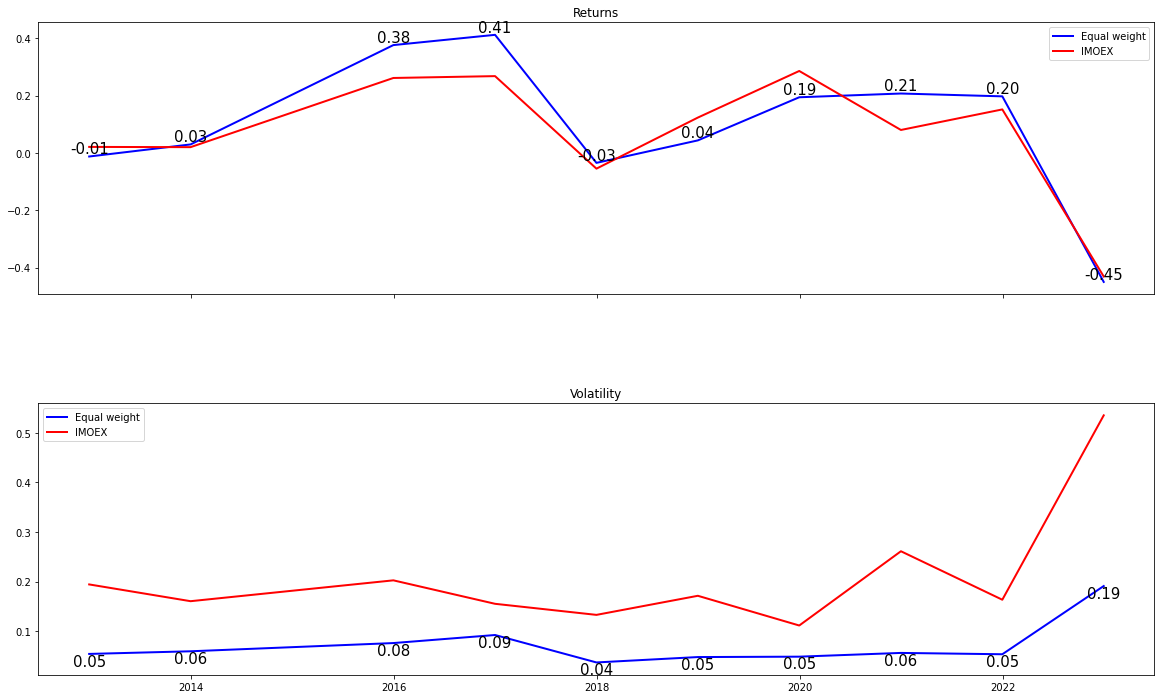

In [173]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), sharex=True)

# plot returns
ax1.plot(yearly_results.index, yearly_results['return'], linewidth=2.0, color = 'blue', label = 'Equal weight')
ax1.plot(yearly_results.index, yearly_results['return_imoex'], linewidth=2.0, color = 'red', label = 'IMOEX')
for i, y in enumerate(yearly_results['return']):
    ax1.text(yearly_results.index[i], y, f'{y:.2f}', ha='center', va='bottom', fontsize=15)
ax1.set_title('Returns')
ax1.legend()

# plot volatility
ax2.plot(yearly_results.index, yearly_results['volatility'], linewidth=2.0, color = 'blue', label = 'Equal weight')
ax2.plot(yearly_results.index, yearly_results['volatility_imoex'], linewidth=2.0, color = 'red', label = 'IMOEX')
for i, y in enumerate(yearly_results['volatility']):
    ax2.text(yearly_results.index[i], y - 0.03, f'{y:.2f}', ha='center', va='bottom', fontsize=15)
ax2.set_title('Volatility')
ax2.legend()
# adjust layout
plt.subplots_adjust(hspace=0.4)

plt.savefig('EW_in_one.jpg', bbox_inches='tight', dpi = 100)

# show the plot
plt.show()
